In [1]:
# montando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score
import sklearn


In [3]:
# cargando la data train
df_train = pd.read_csv('/content/drive/MyDrive/UTEC_ML_data/dataset/sign_mnist_train/sign_mnist_train.csv')
print("""Dimensiones de sign_mnist_train:
  {0} Observaciones  
  {1} Variables:
    1 variable dependiente (target = label)
    {2} variables independientes (pixel 1 ... pixel 1784)
  
  Valores presentes en el target:
    {3}
  """.format(df_train.shape[0], df_train.shape[1],df_train.shape[1]-1,
             df_train.sort_values(by='label')['label'].unique()))
# df_train.head()


Dimensiones de sign_mnist_train:
  27455 Observaciones  
  785 Variables:
    1 variable dependiente (target = label)
    784 variables independientes (pixel 1 ... pixel 1784)
  
  Valores presentes en el target:
    [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
  


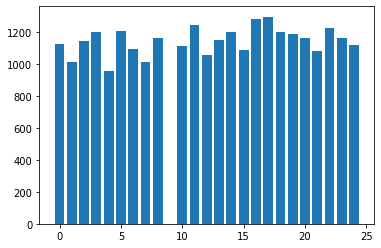

In [4]:
# laa data esta balanceada
barra = df_train.groupby('label')[['label']].count()
col = barra.index
barra['eje_x'] = col
plt.bar(barra['eje_x'],barra['label'])
plt.show()

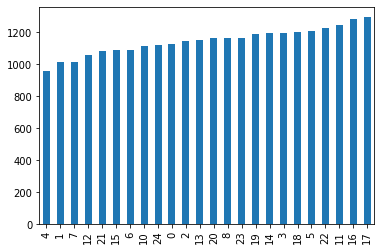

In [5]:
barra = df_train['label'].value_counts()
barra = barra.sort_values()
barra.plot(kind='bar')

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/UTEC_ML_data/dataset/sign_mnist_test/sign_mnist_test.csv')

print("""Dimensiones de sign_mnist_test:
  {0} Observaciones  
  {1} Variables:
    1 variable dependiente (target = label)
    {2} variables independientes (pixel 1 ... pixel 1784)
  
  Valores presentes en el target:
    {3}
  """.format(df_test.shape[0], df_test.shape[1],df_test.shape[1]-1,
             df_test.sort_values(by='label')['label'].unique()))

Dimensiones de sign_mnist_test:
  7172 Observaciones  
  785 Variables:
    1 variable dependiente (target = label)
    784 variables independientes (pixel 1 ... pixel 1784)
  
  Valores presentes en el target:
    [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
  


In [9]:
# preparando X_train y y_train
X_train = df_train.iloc[:,1:].copy()
y_train = df_train.iloc[:,0].copy()
# preparando X_test y y_test
X_test = df_test.iloc[:,1:].copy()
y_test = df_test.iloc[:,0].copy()

In [37]:
# SVM multiclase -  kernel lineal
import sklearn
values_C_0 = [1,10,100]
dict_model_C_0 = {}

for c in values_C_0:
  linear = svm.SVC(kernel='linear', C=c, decision_function_shape='ovo').fit(X_train, y_train)
  print("value c = ",c)

  linear_pred = linear.predict(X_test)
  accuracy_lin = linear.score(X_test, y_test)
  dict_model_C_0[c]= linear
  print("Accuracy Linear Kernel (C = ",c,") :", accuracy_lin)

value c =  1
Accuracy Linear Kernel (C =  1 ) : 0.7816508644729504
value c =  10
Accuracy Linear Kernel (C =  10 ) : 0.7816508644729504
value c =  100
Accuracy Linear Kernel (C =  100 ) : 0.7816508644729504


In [ ]:
print(classification_report(y_test, dict_model_C_0[1]))

In [38]:
# SVM multiclase -  kernel lineal
import sklearn
values_C_1 = [1,10,100]
dict_model_C_1 = {}

for c in values_C_1:
  linear = svm.SVC(kernel='linear', C=c, decision_function_shape='ovr').fit(X_train, y_train)
  print("value c = ",c)
  linear_pred = linear.predict(X_test)
  accuracy_lin = linear.score(X_test, y_test)
  dict_model_C_1[c]= linear
  print("Accuracy Linear Kernel (C = ",c,") :", accuracy_lin)

value c =  1
Accuracy Linear Kernel (C =  1 ) : 0.7816508644729504
value c =  10
Accuracy Linear Kernel (C =  10 ) : 0.7816508644729504
value c =  100
Accuracy Linear Kernel (C =  100 ) : 0.7816508644729504


In [ ]:
print(classification_report(y_test, dict_model_C_1[1]))

In [39]:
# SVM multiclase -  kernel lineal
import sklearn
values_C = [1,10,100]
dict_KF_C = {}
dict_model_C = {}

for c in values_C:
  linear = svm.SVC(kernel='linear', C=c, decision_function_shape='ovo')#.fit(X_train, y_train)
  CV = cross_val_score(estimator = linear, X = X_train, y = y_train, cv = 10)
  print("value c = ",c)
  print("media = ",CV.mean())
  print("sd = ",CV.std())
  
  new_linear = sklearn.base.clone(linear)
  new_linear.fit(X_train, y_train)
  dict_KF_C[c] = new_linear
  linear_pred = new_linear.predict(X_test)
  accuracy_lin = new_linear.score(X_test, y_test)
  dict_model_C[c]= linear_pred
  print("Accuracy Linear Kernel (C = ",c,") :", accuracy_lin)

value c =  1
media =  1.0
sd =  0.0
Accuracy Linear Kernel (C =  1 ) : 0.7816508644729504
value c =  10
media =  1.0
sd =  0.0
Accuracy Linear Kernel (C =  10 ) : 0.7816508644729504
value c =  100
media =  1.0
sd =  0.0
Accuracy Linear Kernel (C =  100 ) : 0.7816508644729504


In [35]:
# evaluacion de redultados
print(classification_report(y_test, dict_model_C[1]))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       331
           1       1.00      0.95      0.97       432
           2       0.78      0.98      0.87       310
           3       0.89      1.00      0.94       245
           4       0.92      1.00      0.96       498
           5       0.68      0.83      0.75       247
           6       0.84      0.86      0.85       348
           7       0.95      0.88      0.91       436
           8       0.73      0.74      0.74       288
          10       0.62      0.40      0.48       331
          11       0.58      0.60      0.59       209
          12       0.87      0.69      0.77       394
          13       0.88      0.63      0.74       291
          14       0.88      0.65      0.75       246
          15       0.90      1.00      0.95       347
          16       0.76      0.95      0.85       164
          17       0.30      0.67      0.41       144
          18       0.61    

In [54]:
# SVM multiclase -  kernel lineal
import sklearn
values_Cr = [1,10,100]
dict_KF_Cr = {}
dict_model_Cr = {}

for c in values_Cr:
  linear = svm.SVC(kernel='linear', C=c, decision_function_shape='ovr')
  CV = cross_val_score(estimator = linear, X = X_train, y = y_train, cv = 10)
  print("value c = ",c)
  print("media = ",CV.mean())
  print("sd = ",CV.std())
  
  new_linear = sklearn.base.clone(linear)
  new_linear.fit(X_train, y_train)
  dict_KF_Cr[c] = new_linear
  linear_pred = new_linear.predict(X_test)
  accuracy_lin = new_linear.score(X_test, y_test)
  dict_model_Cr[c]= linear_pred
  print("Accuracy Linear Kernel (c = ",c,") :", accuracy_lin)

KeyboardInterrupt: ignored

In [ ]:
print(classification_report(y_test, dict_model_Cr[1]))

In [55]:
# SVM multiclase -  kernel lineal
import sklearn
grado = [3, 4 ,5]
dict_model_C_p0 = {}

for g in grado:
  poly = svm.SVC(kernel='poly', degree=g, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  poly_pred = poly.predict(X_test)
  accuracy_poly = poly.score(X_test, y_test)
  dict_model_C_p0[c]= poly
  print("Accuracy poly Kernel (g = ",g,") :", accuracy_poly)

Accuracy poly Kernel (g =  3 ) : 0.782069157836029
Accuracy poly Kernel (g =  4 ) : 0.7695203569436698
Accuracy poly Kernel (g =  5 ) : 0.7663134411600669


In [56]:
# SVM multiclase -  kernel lineal
import sklearn
grado = [3, 4 ,5]

dict_model_C_pr0 = {}

for g in grado:
  poly = svm.SVC(kernel='poly', degree=g, C=1, decision_function_shape='ovr').fit(X_train, y_train)

  poly_pred = poly.predict(X_test)
  accuracy_poly = poly.score(X_test, y_test)
  dict_model_C_pr0[g]= poly
  print("Accuracy poly Kernel (g = ",g,") :", accuracy_poly)

Accuracy poly Kernel (g =  3 ) : 0.782069157836029
Accuracy poly Kernel (g =  4 ) : 0.7695203569436698
Accuracy poly Kernel (g =  5 ) : 0.7663134411600669


In [52]:
print(classification_report(y_test, dict_model_C_pr0[3]))

NameError: ignored

In [ ]:
# SVM multiclase -  kernel lineal
import sklearn
grado = [3, 4 ,5]
dict_KF_C_0_kf = {}
dict_model_C_pr0_kf = {}

for g in grado:
  poly = svm.SVC(kernel='poly', degree=g, C=1, decision_function_shape='ovr')#.fit(X_train, y_train)
  CV = cross_val_score(estimator = linear, X = X_train, y = y_train, cv = 10)
  print("value g = ",g)
  print("media = ",CV.mean())
  print("sd = ",CV.std())
  
  new_poly = sklearn.base.clone(poly)
  new_poly.fit(X_train, y_train)
  dict_KF_C_0_kf[get_ipython] = new_poly
  new_poly_pred = new_poly.predict(X_test)
  accuracy_lin = new_poly.score(X_test, y_test)
  dict_model_C_pr0_kf[g]= new_poly_pred
  print("Accuracy Linear Kernel (g = ",g,") :", accuracy_lin)


value g =  3
media =  1.0
sd =  0.0
Accuracy Linear Kernel (g =  3 ) : 0.782069157836029


In [ ]:
print(classification_report(y_test, dict_model_C_pr0_kf[3]))

In [ ]:
# SVM multiclase -  kernel lineal
import sklearn
grado = [3, 4 ,5]
dict_KF_C_1_kf = {}
dict_model_C_pr1_kf = {}

for g in grado:
  poly = svm.SVC(kernel='poly', degree=g, C=1, decision_function_shape='ovo')#.fit(X_train, y_train)
  CV = cross_val_score(estimator = linear, X = X_train, y = y_train, cv = 10)
  print("value g= ",g)
  print("media = ",CV.mean())
  print("sd = ",CV.std())
  
  new_poly = sklearn.base.clone(poly)
  new_poly.fit(X_train, y_train)
  dict_KF_C_1_kf[g] = new_poly
  new_poly_pred = new_poly.predict(X_test)
  accuracy_lin = new_poly.score(X_test, y_test)
  dict_model_C_pr1_kf[g]= new_poly_pred
  print("Accuracy Linear Kernel (g = ",g,") :", accuracy_lin)

In [53]:
print(classification_report(y_test, dict_model_C_pr1_kf[3]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       331
           1       1.00      0.97      0.99       432
           2       0.82      1.00      0.90       310
           3       0.98      0.95      0.96       245
           4       0.89      0.99      0.94       498
           5       0.74      0.83      0.78       247
           6       0.87      0.88      0.88       348
           7       0.98      0.89      0.94       436
           8       0.60      0.79      0.68       288
          10       0.64      0.37      0.46       331
          11       0.76      0.71      0.73       209
          12       0.78      0.65      0.71       394
          13       0.90      0.63      0.74       291
          14       0.89      0.69      0.78       246
          15       1.00      1.00      1.00       347
          16       0.97      0.90      0.93       164
          17       0.24      0.52      0.33       144
          18       0.58    